In [1]:
import os
import cv2
import pandas as pd
from collections import Counter

train_dir = 'data/training_set'
test_dir = 'data/test_set'

def get_image_sizes(directory):
    sizes = []
    for filename in os.listdir(directory):
        if 'Annotation' not in filename:
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            h, w = img.shape[:2]
            sizes.append((w, h))
    return sizes

# Get sizes for training set
train_sizes = get_image_sizes(train_dir)
test_sizes = get_image_sizes(test_dir)

# Count unique sizes
train_size_counts = Counter(train_sizes)
test_size_counts = Counter(test_sizes)

In [2]:
print("---TRAINING SET IMAGE SIZES---")
print(f"Total images: {len(train_sizes)}")
print(f"Unique sizes: {len(train_size_counts)}")
print("\nSize (W x H) : Count")
for size, count in train_size_counts.items():
    print(f"  {size[0]} x {size[1]} : {count}")

---TRAINING SET IMAGE SIZES---
Total images: 999
Unique sizes: 21

Size (W x H) : Count
  800 x 540 : 975
  782 x 542 : 1
  790 x 539 : 1
  780 x 544 : 1
  800 x 542 : 5
  738 x 541 : 1
  788 x 545 : 1
  799 x 563 : 1
  798 x 541 : 1
  780 x 539 : 1
  796 x 542 : 1
  794 x 543 : 1
  791 x 544 : 1
  797 x 541 : 1
  783 x 541 : 1
  786 x 542 : 1
  796 x 544 : 1
  783 x 543 : 1
  789 x 545 : 1
  794 x 544 : 1
  789 x 540 : 1


In [3]:
print("---TEST SET IMAGE SIZES---")
print(f"Total images: {len(test_sizes)}")
print(f"Unique sizes: {len(test_size_counts)}")
print("\nSize (W x H) : Count")
for size, count in test_size_counts.items():
    print(f"  {size[0]} x {size[1]} : {count}")

---TEST SET IMAGE SIZES---
Total images: 335
Unique sizes: 9

Size (W x H) : Count
  800 x 540 : 327
  788 x 541 : 1
  800 x 543 : 1
  795 x 542 : 1
  786 x 544 : 1
  799 x 544 : 1
  784 x 545 : 1
  784 x 544 : 1
  782 x 541 : 1


In [4]:
!python model.py

Input shape: torch.Size([1, 1, 800, 540])
Output shape: torch.Size([1, 1, 800, 540])
Total parameters: 4,502,218


In [5]:
!python train.py

Using device: cuda
Created and saved new split to /home/zendragonxxx/mlmed2026/practice2/data_split.csv
Training samples: 900, Validation samples: 99 - (10.0%)
Image size: (256, 256), Batch size: 4
Number of epochs: 100
----------------------------------------------------------------------------------------------------
Epoch 001  ||  train_loss 0.220856  train_dice 0.835224  train_iou 0.733407  ||  val_loss 0.117943  val_dice 0.908592  val_iou 0.839547  ||  *** Best model saved! ***
Epoch 002  ||  train_loss 0.096276  train_dice 0.935687  train_iou 0.881570  ||  val_loss 0.079282  val_dice 0.939660  val_iou 0.889680  ||  *** Best model saved! ***
Epoch 003  ||  train_loss 0.072607  train_dice 0.953219  train_iou 0.912475  ||  val_loss 0.096601  val_dice 0.933284  val_iou 0.877888
Epoch 004  ||  train_loss 0.061743  train_dice 0.958558  train_iou 0.922189  ||  val_loss 0.072443  val_dice 0.948735  val_iou 0.903473  ||  *** Best model saved! ***
Epoch 005  ||  train_loss 0.054276  train_

In [6]:
!python test.py

Using device: cuda
Loaded model from /home/zendragonxxx/mlmed2026/practice2/best_model.pth
Processed 50/335 images
Processed 100/335 images
Processed 150/335 images
Processed 200/335 images
Processed 250/335 images
Processed 300/335 images

Predicted masks and overlays saved to: /home/zendragonxxx/mlmed2026/practice2/predictions


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

log = pd.read_csv("training_log.csv")

epoch       = log['epoch'].tolist()
train_loss  = log['train_loss'].tolist()
val_loss    = log['val_loss'].tolist()
train_dice  = log['train_dice'].tolist()
val_dice    = log['val_dice'].tolist()
train_iou   = log['train_iou'].tolist()
val_iou     = log['val_iou'].tolist()

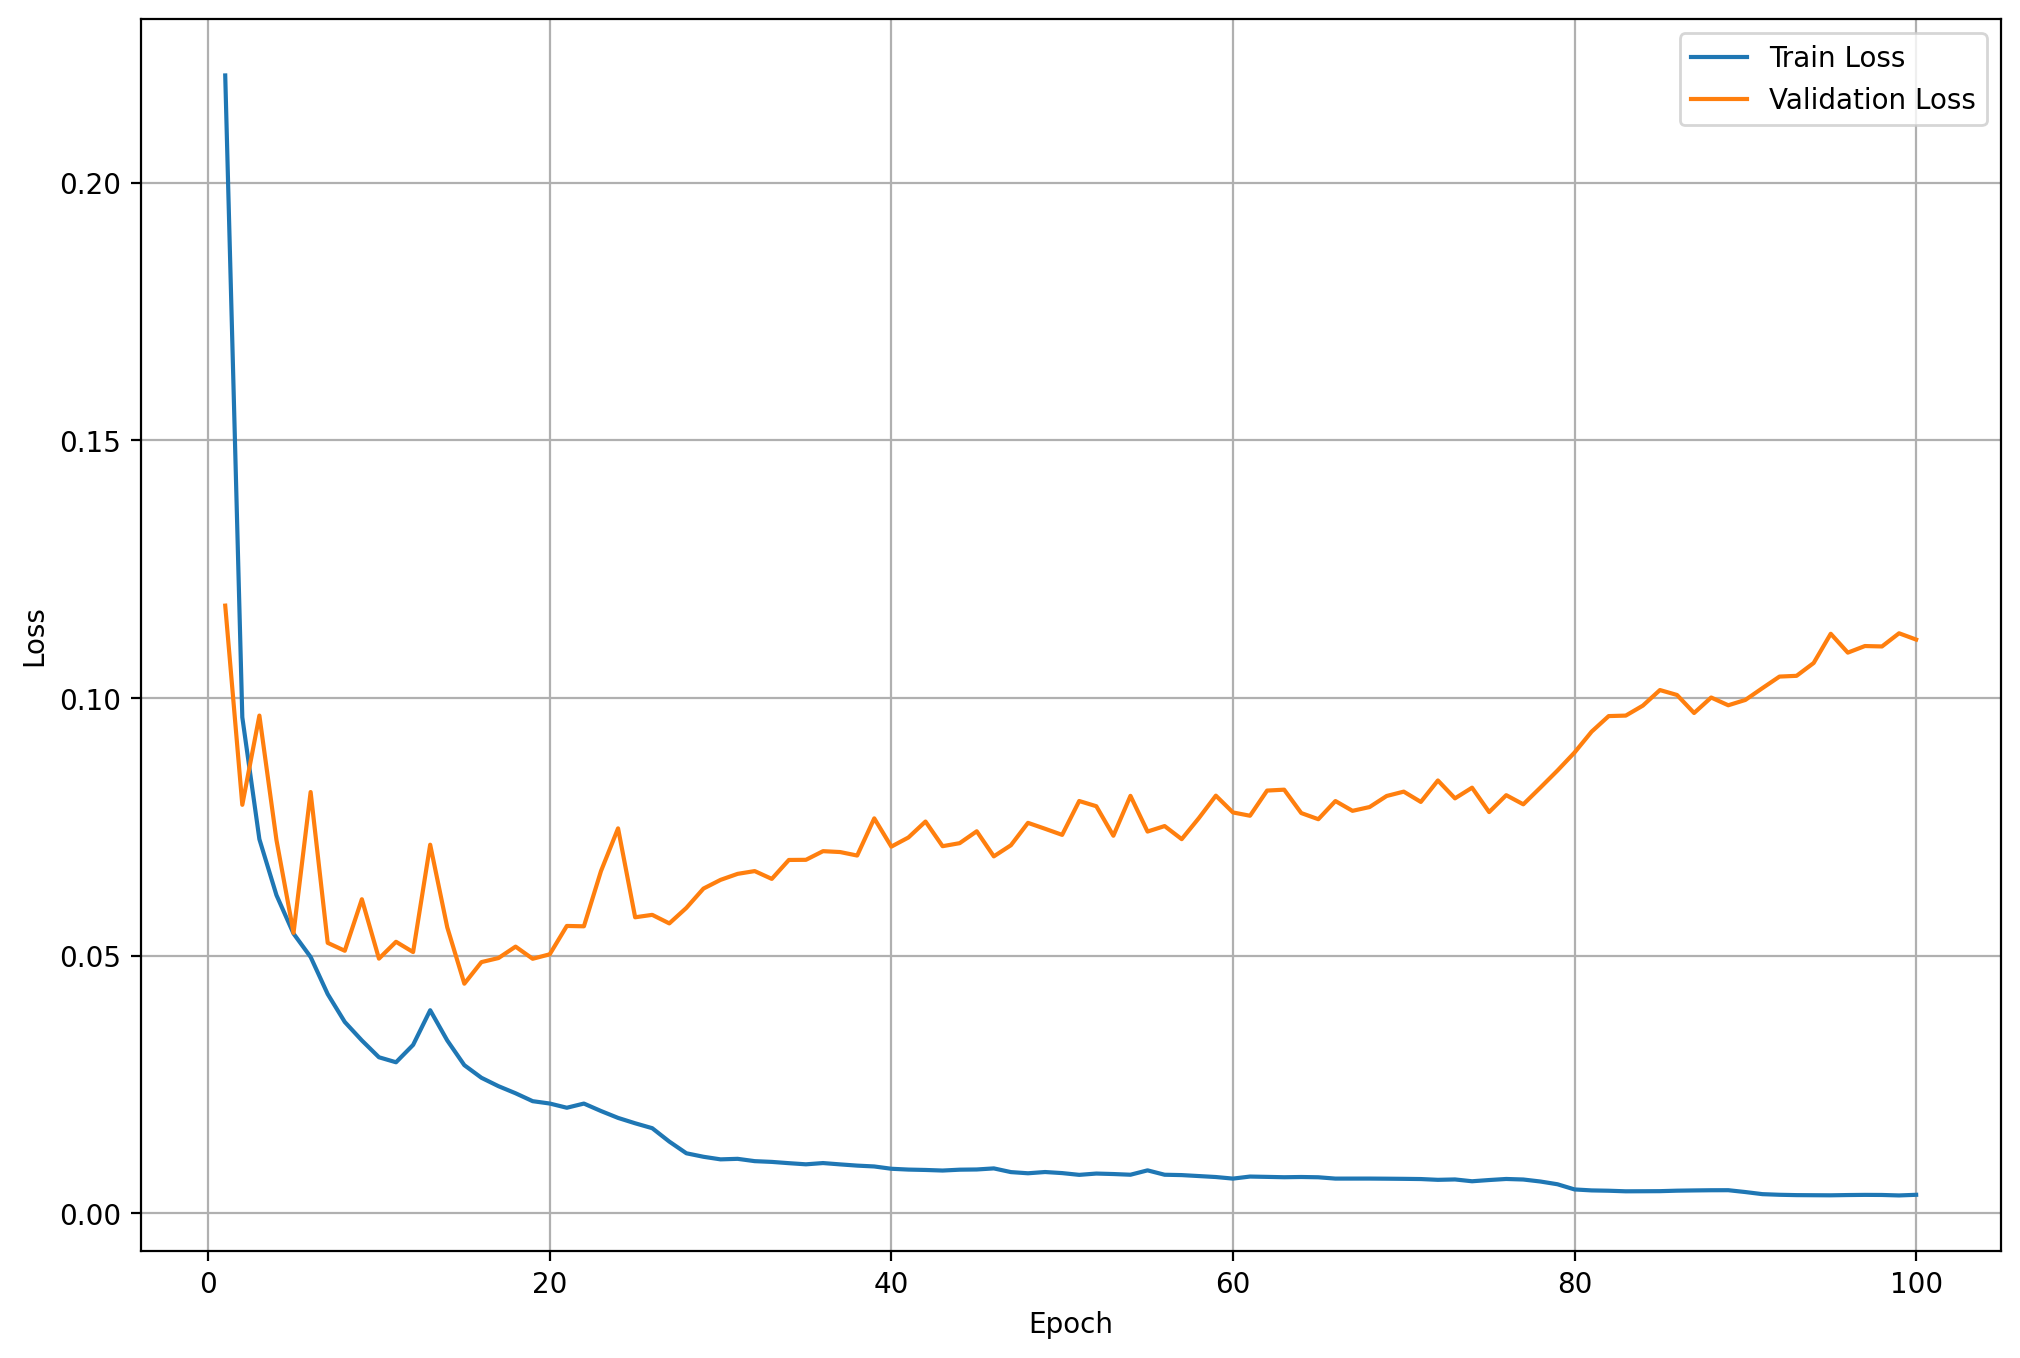

In [8]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(epoch, train_loss, label='Train Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

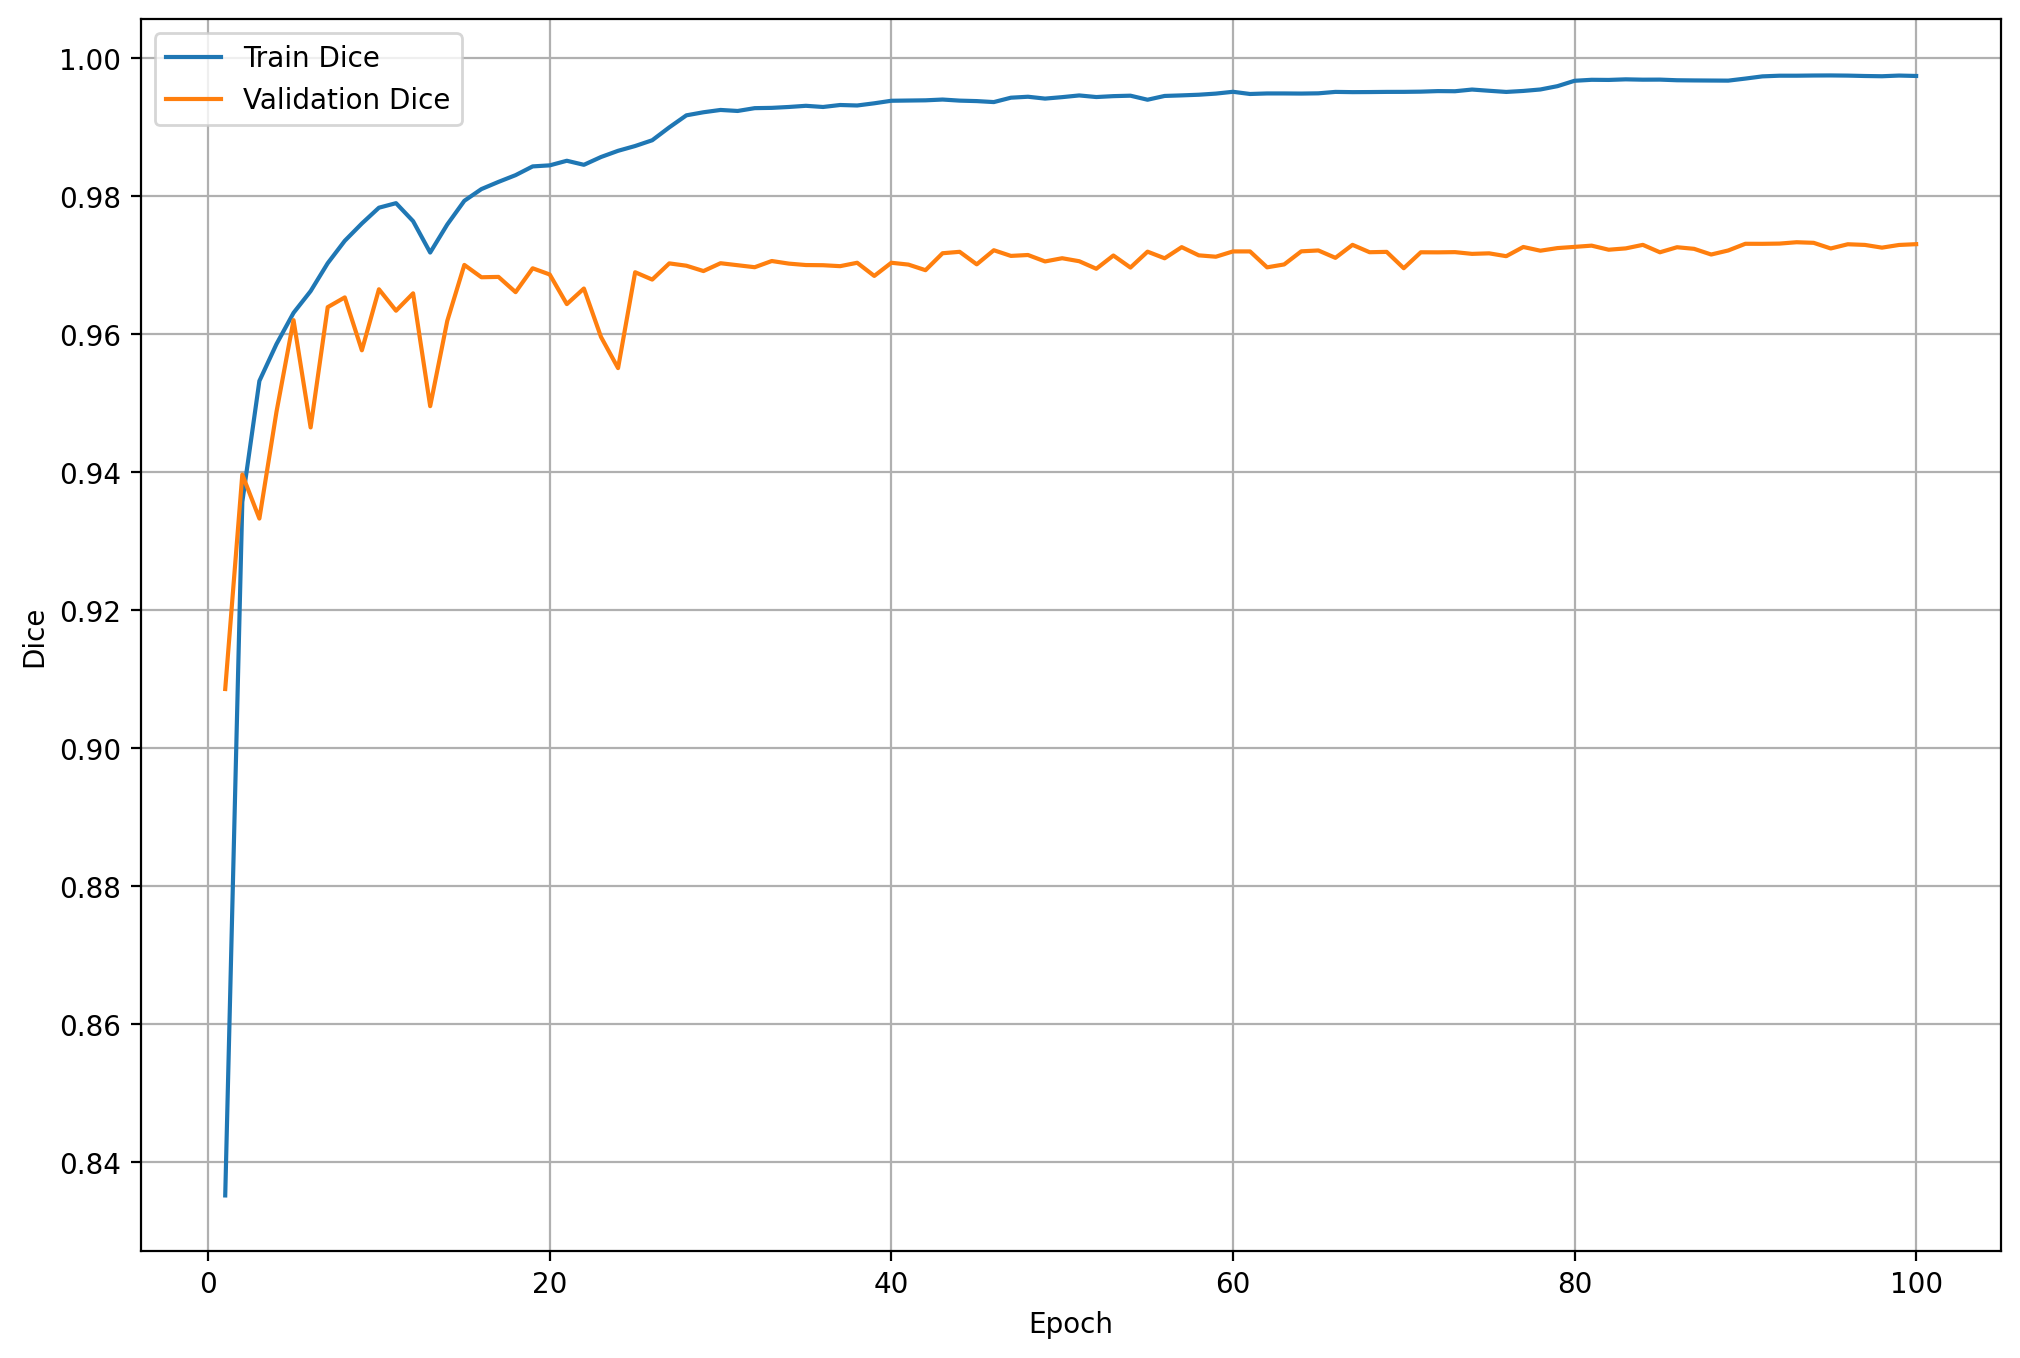

In [9]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(epoch, train_dice, label='Train Dice')
plt.plot(epoch, val_dice, label='Validation Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.grid()
plt.legend()

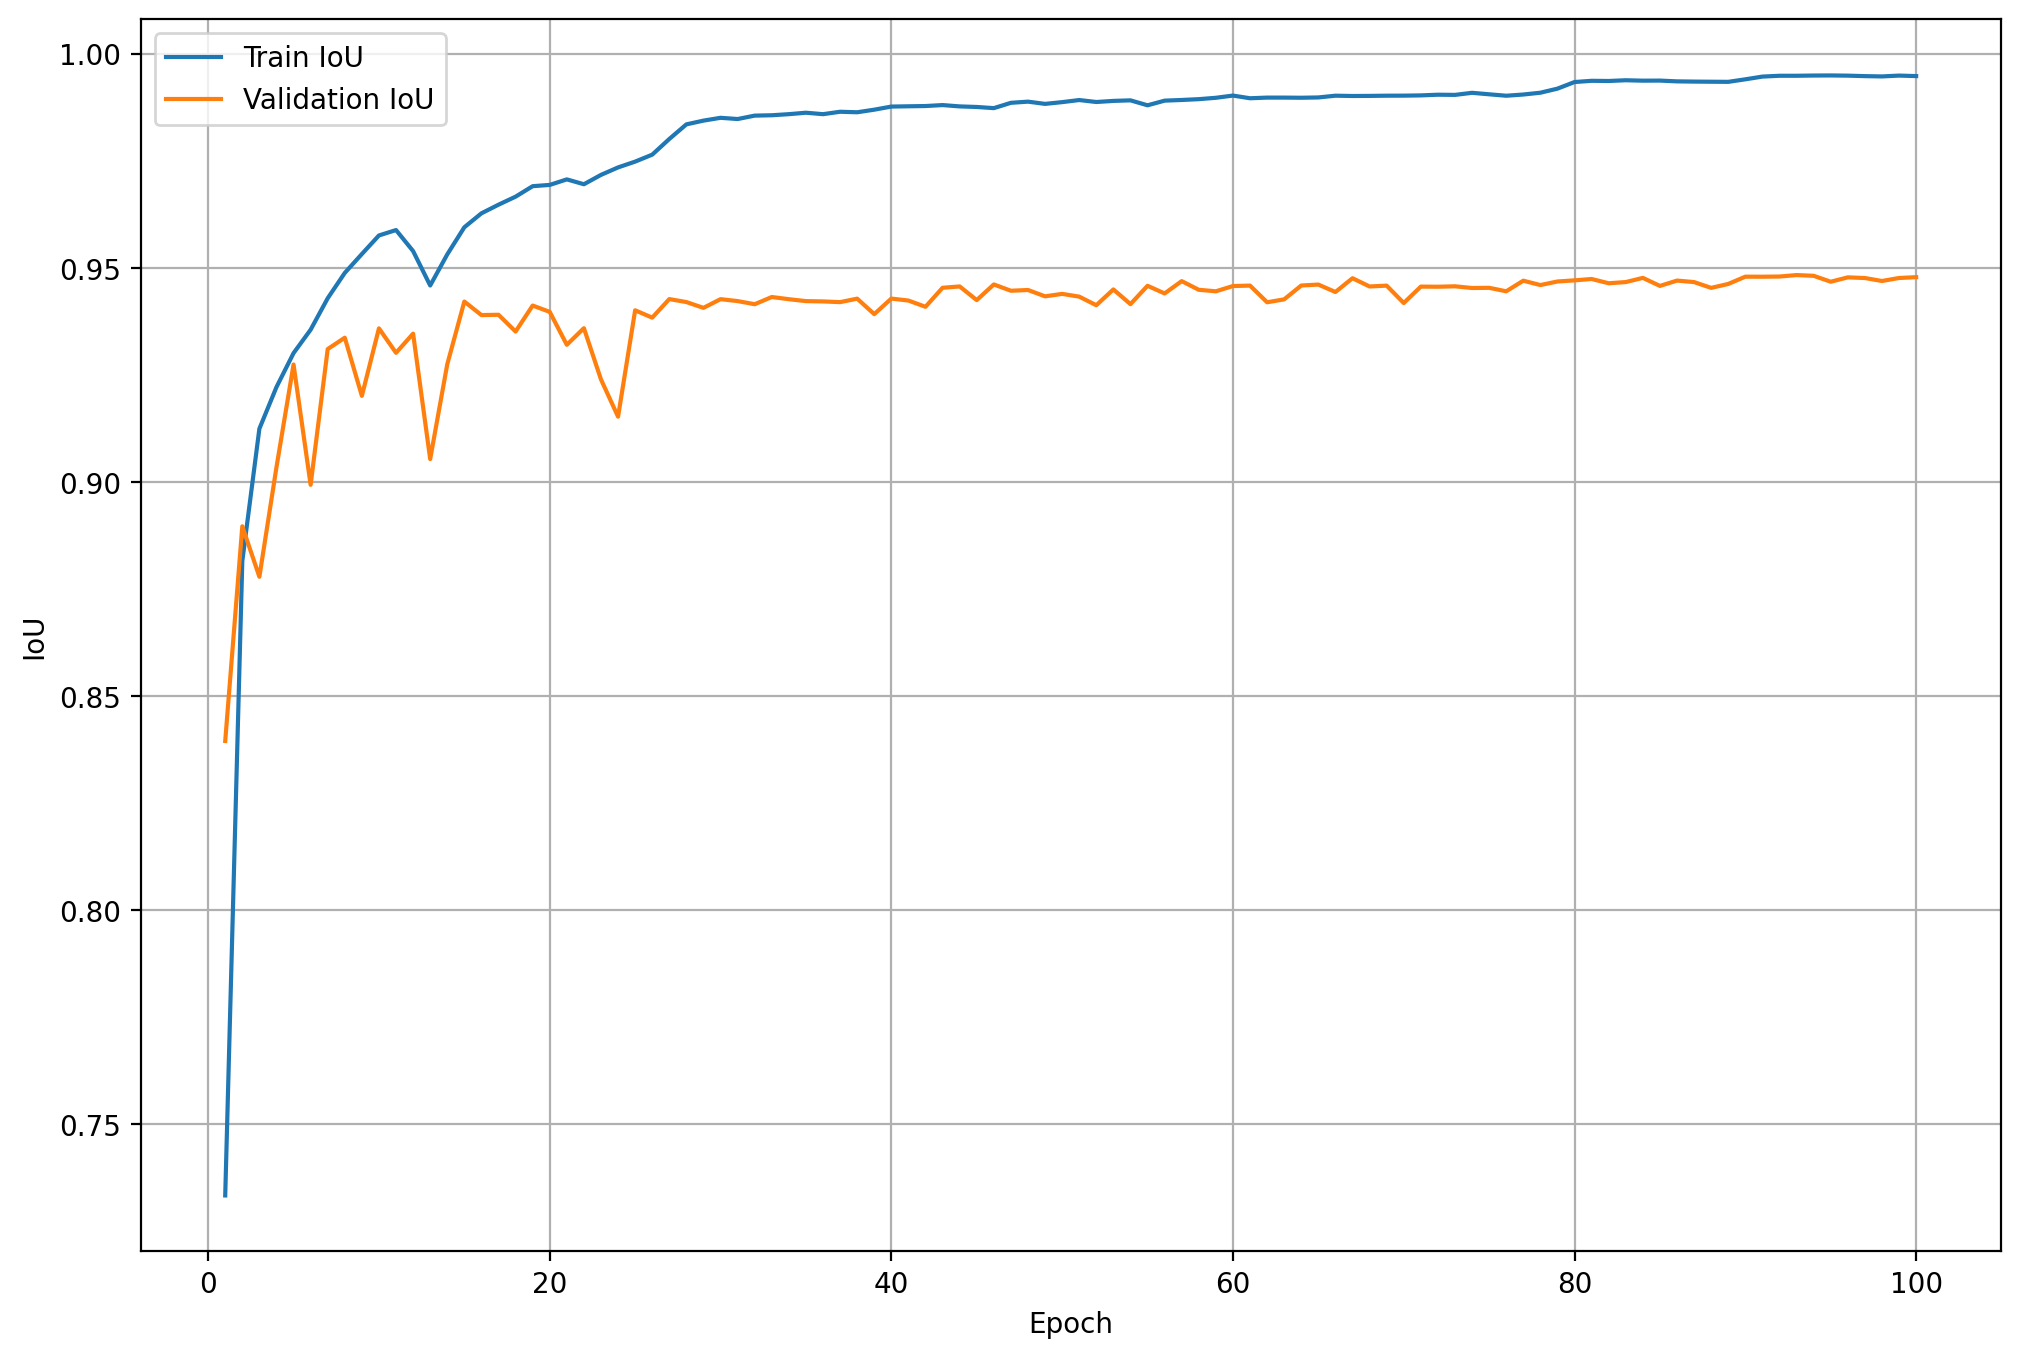

In [10]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(epoch, train_iou, label='Train IoU')
plt.plot(epoch, val_iou, label='Validation IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.grid()
plt.legend()

In [12]:
# Lowest val_loss
lowest_val_loss = log.loc[log['val_loss'].idxmin()]
print(lowest_val_loss)

epoch         15.000000
train_loss     0.028743
train_dice     0.979321
train_iou      0.959519
val_loss       0.044559
val_dice       0.970031
val_iou        0.942170
Name: 14, dtype: float64


In [13]:
# Highest val_iou
highest_val_iou = log.loc[log['val_iou'].idxmax()]
print(highest_val_iou)

epoch         93.000000
train_loss     0.003518
train_dice     0.997443
train_iou      0.994902
val_loss       0.104318
val_dice       0.973318
val_iou        0.948355
Name: 92, dtype: float64


In [14]:
# Highest val_dice
highest_val_dice = log.loc[log['val_dice'].idxmax()]
print(highest_val_dice)

epoch         93.000000
train_loss     0.003518
train_dice     0.997443
train_iou      0.994902
val_loss       0.104318
val_dice       0.973318
val_iou        0.948355
Name: 92, dtype: float64


Using device: cuda
Loaded split. Found 99 validation images.
Processing 99 validation images...
Loaded model from /home/zendragonxxx/Documents/ZenDragonXXX/B3/Machine Learning in Medicine/mlmed2026/practice2/best_model.pth


100%|██████████| 99/99 [00:02<00:00, 42.20it/s]



--- Validation Results ---
Total processed: 99
Valid predictions: 99
Mean Absolute Error (MAE): 2.33 mm
Root Mean Squared Error (RMSE): 3.98 mm
R-squared: 0.9962


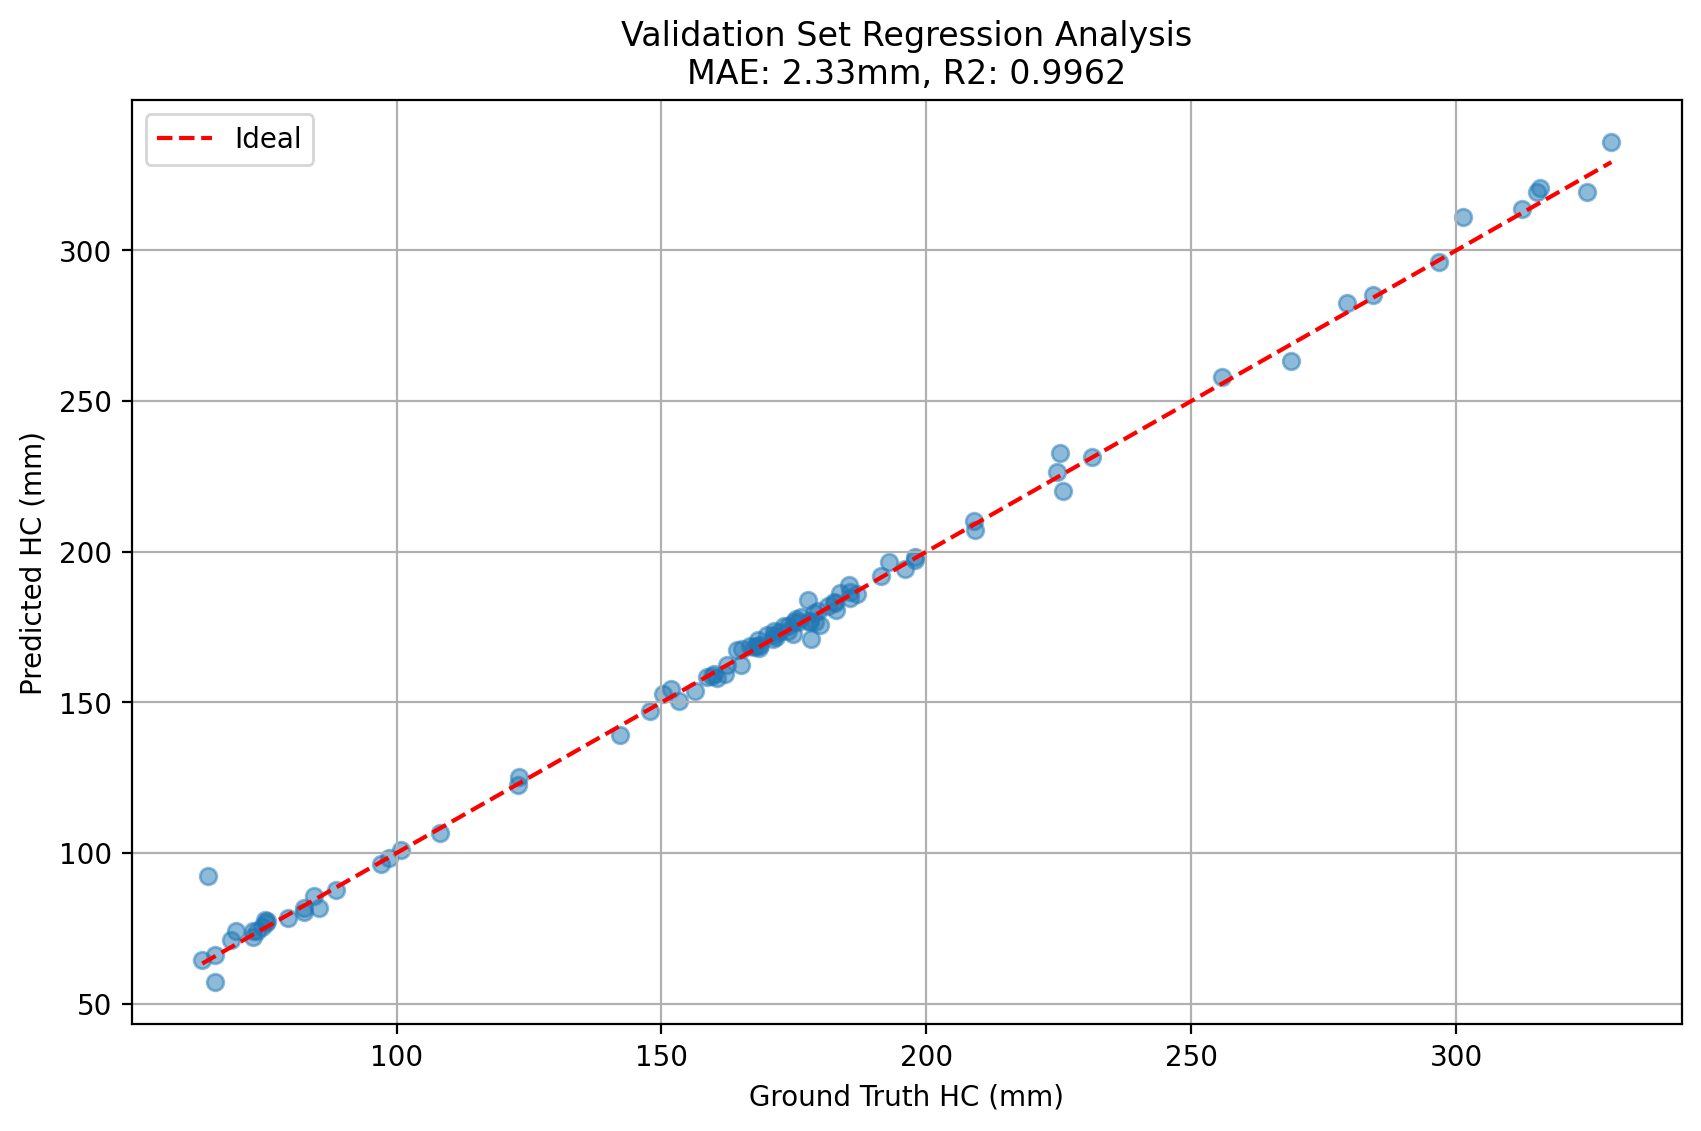

In [4]:
%run val_reg.py

In [16]:
!python test_reg.py

Using device: cuda
Loaded test CSV with 335 entries
Loaded model from /home/zendragonxxx/mlmed2026/practice2/best_model.pth
Starting prediction on test set...
100%|█████████████████████████████████████████| 335/335 [00:04<00:00, 69.02it/s]
Saved predictions to /home/zendragonxxx/mlmed2026/practice2/test_set_HC.csv
